In [2]:
import pandas as pd #for importing dataset
import numpy as nm #for doing mathematical operations
from sklearn.model_selection import train_test_split as ttp
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt

In [3]:
data_true=pd.read_csv("/content/drive/MyDrive/True.csv")
data_fake=pd.read_csv("/content/drive/MyDrive/Fake.csv")

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
data_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
data_true.shape, data_fake.shape

((21417, 4), (23481, 4))

In [7]:
data_true["class"]=1
data_fake["class"]=0

In [8]:
data_true_manual_testing = data_true.tail(10)
for i in range(21216,21406,-1):
  data_true.drop([i],axis=0, inplace=True)

data_fake_manual_testing = data_fake.tail(10)
for i in range(21416,21406,-1):
  data_fake.drop([i],axis=0, inplace=True)

In [9]:
data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing])
data_manual_testing.to_csv("manual_testing.csv")

In [10]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10) #displaying first 10 values after above operation

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4449
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


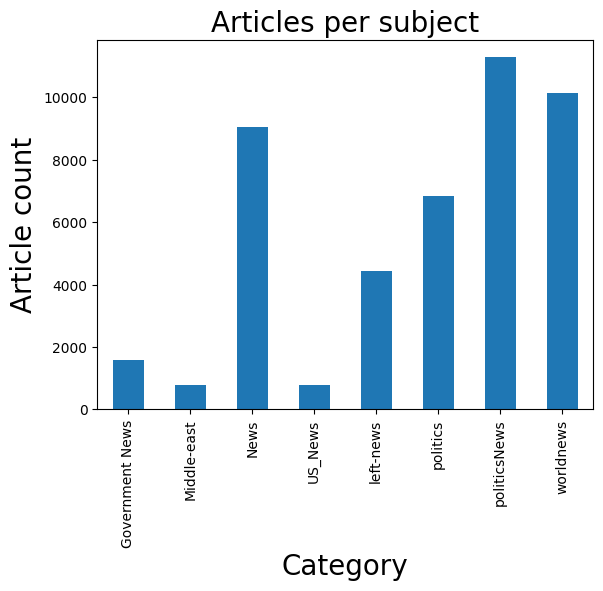

In [11]:
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.title("Articles per subject",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Article count",size=20)
plt.show()

class
0    23471
1    21417
Name: text, dtype: int64
0 = Fake news
1 = True news


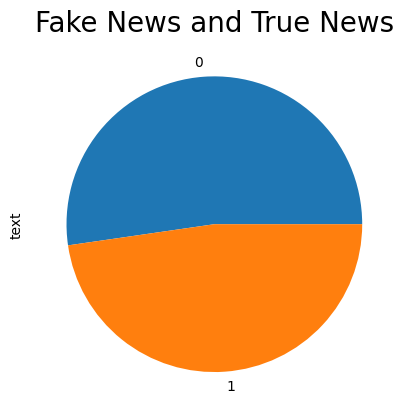

In [12]:
print(data_merge.groupby(['class'])['text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['text'].count().plot(kind="pie")
plt.title("Fake News and True News",size=20)
plt.show()

In [13]:
data = data_merge.drop(["title","subject","date"],axis=1)
data.head(10) #displaying remaining dataset

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [14]:
#shuffling data for better prediction
data=data.sample(frac=1)
data.head(10)

,text,class
15863,Evil hiding under the banner of religion in ...,0
4637,WASHINGTON (Reuters) - The top Democrat on the...,1
13408,Voicemails from the DNC have been released by ...,0
21085,"XIAMEN, China (Reuters) - The nations of the B...",1
10580,SAN FRANCISCO (Reuters) - The U.S. National Se...,1
130,WASHINGTON (Reuters) - U.S. Republican Senator...,1
6542,WASHINGTON (Reuters) - Republican U.S. Senator...,1
4856,BEIJING (Reuters) - Chinese Foreign Minister W...,1
19706,Here is Danney Williams tragic story. There is...,0
13487,Don t you wish every political ad could be ret...,0


In [15]:
data.isnull().sum()


text     0
class    0
dtype: int64

In [16]:
def filtering(data):
  text=data.lower()
  text=re.sub('\[.*?\]', '', text)
  text=re.sub("\\W"," ",text)
  text=re.sub('https?://\S+|www\.\S+', '', text)
  text=re.sub('<.*?>+', '', text)
  text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text=re.sub('\n', '', text)
  text=re.sub('\w*\d\w*', '', text)
  return text


In [17]:
data["text"]=data["text"].apply(filtering)
data.head(10)


,text,class
15863,evil hiding under the banner of religion in ...,0
4637,washington reuters the top democrat on the...,1
13408,voicemails from the dnc have been released by ...,0
21085,xiamen china reuters the nations of the b...,1
10580,san francisco reuters the u s national se...,1
130,washington reuters u s republican senator...,1
6542,washington reuters republican u s senator...,1
4856,beijing reuters chinese foreign minister w...,1
19706,here is danney williams tragic story there is...,0
13487,don t you wish every political ad could be ret...,0


In [18]:
x=data['text'] #independent
y=data['class'] #dependent

In [19]:
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [21]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [23]:
pred_lr=LR.predict(xv_test)

LR.score(xv_test, y_test)

print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5909
           1       0.99      0.99      0.99      5313

    accuracy                           0.99     11222
   macro avg       0.99      0.99      0.99     11222
weighted avg       0.99      0.99      0.99     11222



In [24]:
from sklearn.linear_model import LinearRegression
LR  = LinearRegression()

In [25]:
t = [[5],[7],[12],[16],[20]]
m=[40,120,180,210,240]

LR.fit(t,m)

LinearRegression()

In [26]:
LR.predict([[5.5]])

array([78.64935065])

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [30]:
RFC.score(xv_test,y_test)

0.9908216004277313

In [31]:
pred_RFC = RFC.predict(xv_test)

In [32]:
print(classification_report(y_test,pred_RFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5909
           1       0.99      0.99      0.99      5313

    accuracy                           0.99     11222
   macro avg       0.99      0.99      0.99     11222
weighted avg       0.99      0.99      0.99     11222



In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [35]:
DT.score(xv_test,y_test).round(2)

1.0

In [36]:
pred_DT = DT.predict(xv_test)

In [37]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5909
           1       1.00      1.00      1.00      5313

    accuracy                           1.00     11222
   macro avg       1.00      1.00      1.00     11222
weighted avg       1.00      1.00      1.00     11222



In [39]:
def predict_news(text):
 text_vectorized = vectorization.transform([filtering(text)])
 prediction = RFC.predict(text_vectorized)
 if prediction == 1:
     return "This news is likely true."
 else:
     return "This news is likely fake."
user_input = input("Enter news text: ")
result = predict_news(user_input)
print(result)

Enter news text: BAD
This news is likely fake.
